# Deep learning for multiclass text classification
#### Applied Text Mining - Utrecht Summer School

Welcome to the sixth practical of the course “Applied Text Mining”. In this practical, we will apply various deep learning models for multiclass classification. We will work with the 20 Newsgroups data set from the sklearn library and will apply deep learning models on that using the Keras library. 

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. It was originally collected by Ken Lang, and it has become a popular data set for experiments in text applications of machine learning techniques.

On the other hand, today we will use the Keras library, which is a deep learning and neural networks API by François Chollet which is capable of running on top of Tensorflow (Google), Theano or CNTK (Microsoft).

Today we will use the following libraries. Take care to have them installed!

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras import layers

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Let's get started!

1\. **Load the tarin and test subsets of the 20 Newsgroups data set from sklearn datasets. Remove the headers, footers and qoutes from the news article when loading data sets. Use 45 for random_state. In order to get faster execution times for this practical we will work on a partial dataset with only 5 categories out of the 20 available in the dataset ('rec.sport.hockey', 'talk.politics.mideast', 'soc.religion.christian', 'comp.graphics', 'sci.med').**

In [2]:
categories = ['rec.sport.hockey', 'talk.politics.mideast', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
twenty_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), 
                                  categories=categories, shuffle=True, random_state=321)
# type(twenty_train)

In [4]:
twenty_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), 
                                 categories=categories, shuffle=True, random_state=321)

2\. **Find out about the number of news articles in train and test sets.**

In [5]:
twenty_train.target_names

['comp.graphics',
 'rec.sport.hockey',
 'sci.med',
 'soc.religion.christian',
 'talk.politics.mideast']

In [6]:
twenty_train.filenames.shape

(2941,)

In [7]:
twenty_test.filenames.shape

(1958,)

3\. **Covert the train and test to dataframes.**

In [8]:
import pandas as pd
df_train = pd.DataFrame(list(zip(twenty_train.data, twenty_train.target)), columns=['text', 'label'])
df_train.head()

,text,label
0,\nDr. cheghadr bA namakand! They just wait un...,4
1,\n\n\n\n\n:) No...I was one of the lucky ones....,2
2,\n\n[After a small refresh Hasan got on the tr...,4
3,Before getting excited and implying that I am ...,4
4,I have posted disp135.zip to alt.binaries.pict...,0


In [9]:
df_test = pd.DataFrame(list(zip(twenty_test.data, twenty_test.target)), columns=['text', 'label'])
df_test.head()

,text,label
0,"hi all, Ive applied for the class of 93 at qui...",2
1,:In article <enea1-270493135255@enea.apple.com...,2
2,"\nI don't know the answer the to this one, alt...",0
3,\n\nWe here at IBM have the same problem with ...,0
4,\nI was at an Adobe seminar/conference/propaga...,0


4\. **In order to feed predictive deep learning models with the text data, one first needs to turn the text into vectors of numerical values suitable for statistical analysis. Use the binary representation with TfidfVectorizer and create document-term matrices for test and train (name them X_train and X_test).**

In [10]:
tfidf = TfidfVectorizer(binary=True)

def tfidf_features(txt, flag):
    if flag == "train":
        x = tfidf.fit_transform(txt)
    else:
        x = tfidf.transform(txt)
    x = x.astype('float16')
    return x 

X_train = tfidf_features(df_train.text.values, flag="train")
X_test = tfidf_features(df_test.text.values, flag="test")

# With CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer()
# X_train = count_vect.fit_transform(df_train.text.values)
# X_train.shape
# X_test = count_vect.transform(df_test.text.values)

In [13]:
X_train.nnz / float(X_train.shape[0])

111.5678340700442

The extracted vectors are very sparse, with an average of 111 non-zero components by sample in a more than 37000-dimensional space (less than 0.3% non-zero features)

In [14]:
X_test.nnz / float(X_train.shape[0])


75.78748724923496

In [15]:
tfidf.vocabulary_

{'dr': 11831,
 'cheghadr': 7790,
 'ba': 5229,
 'namakand': 23053,
 'they': 33351,
 'just': 19216,
 'wait': 35850,
 'until': 34946,
 'are': 4507,
 'teenagers': 33019,
 'to': 33637,
 'kill': 19570,
 'them': 33280,
 'huh': 17121,
 'yup': 36995,
 'iri': 18569,
 'also': 3839,
 'granted': 15615,
 'great': 15673,
 'deal': 10311,
 'of': 24102,
 'reconstruction': 27894,
 'houses': 17031,
 'and': 4048,
 'buildings': 6819,
 'in': 17695,
 'war': 35900,
 'torn': 33751,
 'areas': 4509,
 'malaysia': 21218,
 'khak': 19512,
 'too': 33713,
 'sareshoon': 29498,
 'one': 24265,
 'the': 33264,
 'only': 24281,
 'industries': 17864,
 'we': 36023,
 'really': 27764,
 'have': 16323,
 'is': 18615,
 'construction': 9123,
 'there': 33323,
 'all': 3748,
 'these': 33341,
 'unemployed': 34686,
 'youth': 36969,
 'give': 15292,
 'money': 22531,
 'do': 11634,
 'what': 36180,
 'iranians': 18556,
 'can': 7145,
 'should': 30510,
 'be': 5586,
 'doing': 11683,
 'no': 23621,
 'was': 35945,
 'lucky': 20918,
 'ones': 24270,
 've

5\. **Use the LabelEncoder to create y_train and y_test.**

In [37]:
# Converting the list of strings to the matrix of vectors (to be fed neural network models)
# Encode the list of newsgroups into categorical integer values
lb = LabelEncoder()
y = lb.fit_transform(df_train.label.values)
y_train = keras.utils.to_categorical(y)

In [12]:
y_train.shape

(2941, 5)

In [23]:
y = lb.transform(df_test.label.values)
y_test = keras.utils.to_categorical(y)


6\. **Use the sequential API in Keras and create a one-hidden-layer neural network. So, the first layer will be input layer with the number of features in your X_train, then one hidden layer, then one output layer. Set the number of neurons 5 in the hidden layer and activation function as relu. For the output layer you can use a softmax activation function.**

The sequential API (https://www.tensorflow.org/guide/keras/sequential_model) allows you to create models layer by layer. It is limited in that it does not allow to create models that share layers or have multiple inputs or outputs.

The functional API (https://www.tensorflow.org/guide/keras/functional) allows you to create models that have a lot more flexibility as you can define models where layers connect to more than just the previous and next layers. In this way, you can connect layers to (literally) any other layer. As a result, creating complex networks such as Siamese neural networks and residual neural networks become possible.

In [19]:
model = Sequential()
input_dim = X_train.shape[1]  # Number of features
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

7\. **The compile function defines the loss function, the optimizer and the metrics. Call this function for your neural network model with loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']. Check the summary of the model.**

In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                371490    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
Total params: 371,545
Trainable params: 371,545
Non-trainable params: 0
_________________________________________________________________


8\. **Time to train your model! Train your model in 20 iterations. What is batch_size?**

In [34]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512)
# model.save_weights("model.h5")
# print("Saved model to disk")

Epoch 1/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.9558
Epoch 2/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2696 - accuracy: 0.9599
Epoch 3/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2591 - accuracy: 0.9626
Epoch 4/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.9660
Epoch 5/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2388 - accuracy: 0.9670
Epoch 6/20
6/6 [==============================] - 0s 4ms/step - loss: 0.2292 - accuracy: 0.9680
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 0.2199 - accuracy: 0.9708
Epoch 8/20
6/6 [==============================] - 0s 6ms/step - loss: 0.2109 - accuracy: 0.9708
Epoch 9/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.9711
Epoch 10/20
6/6 [==============================] - 0s 5ms/step - loss: 0.1939 - accuracy: 0.9718
Epoch 11/20
6/6 [======================

Note that if you rerun the fit() method, you will start off with the computed weights from the previous training. Make sure to call clear_session() before you start training the model again:

**from keras.backend import clear_session <br>
clear_session()**

9\. **Plot the accuracy and loss of your trained model.**

dict_keys(['loss', 'accuracy'])


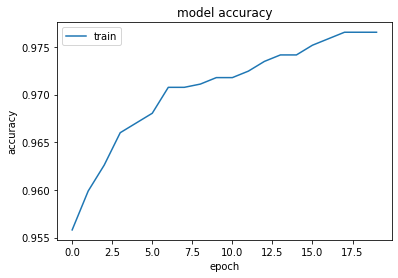

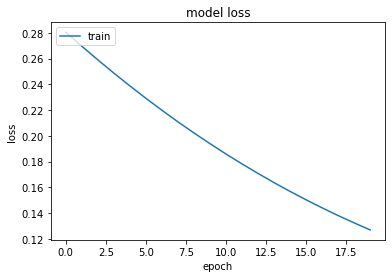

In [35]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# convert the code to a function
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

10\. **Evaluate the accuracy of your trained model on the test set. Compare that with the accuarcy of train.**

In [33]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss,accuracy))

62/62 [==============================] - 0s 785us/step - loss: 0.3439 - accuracy: 0.7916
Test set
  Loss: 0.344
  Accuracy: 0.792


You can already see that the model was overfitting since it reached over 95% accuracy for the training set. When training a model, you can use a separate testing and validation set. What you would usually do is take the model with the highest validation accuracy and then test the model with the testing set.

11\. **Plot the dendrogram of the hierarchical clustering.**

12\. **Train a Negative Matrix Factorization model for topic modeling on a tf document-term matrix of the BBCSport dataset.**

13\. **Show top 10 words per topic with their probabilities.**

14\. **Use the NMF model and identify the topic of a new text: "Robben open to playing at Euro 2020 with Netherlands after bagging two assists for Groningen"? Simply call the transform function of the model and it will give you a score of each topic. Choose the topic with the highest score to determine it’s topic.**

15\. ****Train a Latent Dirichlet Allocation model for topic modeling and repeat the steps in 12, 13 and 14.****

16\. **Compare the performance of the LDA model versus the NMF model.**